In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import pandas as pd
import numpy as np
import plotly.express as px


You MUST include visualizations of your dataset (if possible) and your results. Visualizations include graphs, charts, tables. Code snippets do not count as visualizations. You can use Matplotlib or Seaborn to create your visualizations. We recommend using Plotly for interactive visualizations in Python as well as interactive visualizations on your website.

In [5]:
file_path = 'cell2celltrain_clean_updated.csv'
data = pd.read_csv(file_path)

data.head()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
0,3000002,1,-0.783391,-0.579032,-1.045275,-0.288506,-0.413714,-0.124522,-0.568070,-0.452482,...,0,0,0,1,0,0,0,1,0,0
1,3000010,1,-0.941570,-0.974488,-1.255720,-0.400881,-0.413714,-0.124522,0.029924,0.029852,...,0,0,0,1,0,0,0,0,0,1
2,3000014,0,-0.467484,-0.978272,-0.371853,-0.400881,-0.413714,-0.124522,0.037741,0.029852,...,1,0,0,0,0,0,0,0,0,1
3,3000022,0,0.531686,1.489066,1.185434,0.156497,-0.413714,-0.124522,0.659185,0.235479,...,0,0,1,0,0,0,0,1,0,0
4,3000026,1,-0.938185,-0.993409,-1.255720,-0.400881,-0.413714,-0.124522,0.045558,0.024775,...,0,0,0,1,0,0,0,0,0,1


In [22]:
cols = data.columns.values.tolist()
cols

['CustomerID',
 'Churn',
 'MonthlyRevenue',
 'MonthlyMinutes',
 'TotalRecurringCharge',
 'DirectorAssistedCalls',
 'OverageMinutes',
 'RoamingCalls',
 'PercChangeMinutes',
 'PercChangeRevenues',
 'DroppedCalls',
 'BlockedCalls',
 'UnansweredCalls',
 'CustomerCareCalls',
 'ThreewayCalls',
 'ReceivedCalls',
 'OutboundCalls',
 'InboundCalls',
 'PeakCallsInOut',
 'OffPeakCallsInOut',
 'DroppedBlockedCalls',
 'CallForwardingCalls',
 'CallWaitingCalls',
 'MonthsInService',
 'UniqueSubs',
 'ActiveSubs',
 'Handsets',
 'HandsetModels',
 'CurrentEquipmentDays',
 'AgeHH1',
 'AgeHH2',
 'ChildrenInHH',
 'HandsetRefurbished',
 'HandsetWebCapable',
 'TruckOwner',
 'RVOwner',
 'Homeownership',
 'BuysViaMailOrder',
 'RespondsToMailOffers',
 'OptOutMailings',
 'NonUSTravel',
 'OwnsComputer',
 'HasCreditCard',
 'RetentionCalls',
 'RetentionOffersAccepted',
 'NewCellphoneUser',
 'NotNewCellphoneUser',
 'ReferralsMadeBySubscriber',
 'IncomeGroup',
 'OwnsMotorcycle',
 'AdjustmentsToCreditRating',
 'HandsetP

We will visualize the data in order to observe some trends and patterns in it. Our features are: 

In [10]:
data.shape

(49752, 75)

In [8]:
data.describe()

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,Occupation_Crafts,Occupation_Homemaker,Occupation_Other,Occupation_Professional,Occupation_Retired,Occupation_Self,Occupation_Student,MaritalStatus_No,MaritalStatus_Unknown,MaritalStatus_Yes
count,4.975200e+04,49752.000000,4.975200e+04,4.975200e+04,4.975200e+04,4.975200e+04,4.975200e+04,4.975200e+04,4.975200e+04,4.975200e+04,...,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000,49752.000000
mean,3.200958e+06,0.286320,1.253933e-16,9.911494e-17,1.353012e-16,2.799212e-17,1.453162e-17,5.912620e-17,5.784085e-18,7.140846e-19,...,0.030290,0.003156,0.732694,0.174485,0.014592,0.017527,0.007578,0.253196,0.374839,0.371965
std,1.164694e+05,0.452045,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,...,0.171386,0.056087,0.442558,0.379530,0.119916,0.131225,0.086720,0.434847,0.484086,0.483334
min,3.000002e+06,0.000000,-1.464171e+00,-9.934090e-01,-2.223764e+00,-4.008808e-01,-4.137140e-01,-1.245221e-01,-1.509970e+01,-2.809026e+01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.100094e+06,0.000000,-5.665430e-01,-6.944524e-01,-7.085644e-01,-4.008808e-01,-4.137140e-01,-1.245221e-01,-2.788441e-01,-1.478499e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.200144e+06,0.000000,-2.332608e-01,-3.008893e-01,-7.723144e-02,-2.885063e-01,-3.824934e-01,-1.245221e-01,2.601535e-02,2.223656e-02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.303643e+06,1.000000,2.751243e-01,3.727090e-01,5.541015e-01,4.412242e-02,2.559666e-03,-9.405991e-02,2.996072e-01,7.047004e-02,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,3.399974e+06,1.000000,2.628039e+01,1.293078e+01,1.486432e+01,7.124464e+01,4.455425e+01,1.128294e+02,2.033825e+01,6.307608e+01,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Distribution of Monthly Revenue: We can visualize the distribution of the MonthlyRevenue feature to see if there are any patterns or outliers.

Churn Rate by Occupation: Since we have occupation data, we can plot the churn rate for different occupations to see if there's a trend.

Correlation Heatmap: A heatmap of the correlations between different numerical features could reveal some interesting relationships.

Monthly Minutes vs. Monthly Revenue: A scatter plot to check if there's a relationship between the amount of time spent on calls and the monthly revenue.

Churn Proportion: A pie chart to show the proportion of churned customers versus those who haven't churned.

Overage Minutes Distribution: A histogram to show the distribution of overage minutes among customers.

In [6]:

def plot_monthly_revenue_distribution(data):
    plt.figure(figsize=(10, 6))
    sns.histplot(data['MonthlyRevenue'], kde=True, bins=30)
    plt.title('Distribution of Monthly Revenue')
    plt.xlabel('Monthly Revenue')
    plt.ylabel('Frequency')
    plt.show()

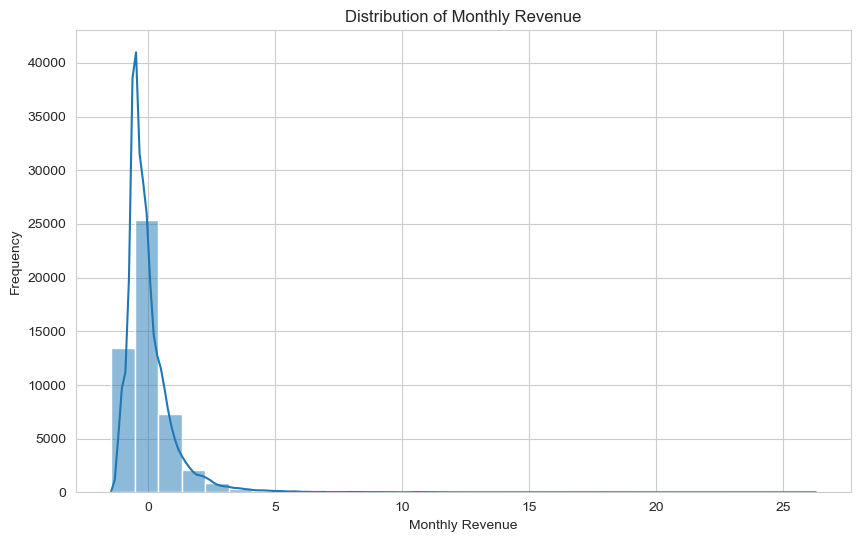

In [7]:
plot_monthly_revenue_distribution(data)

In [16]:

def plot_correlation_heatmap(data):
    corr = data.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    plt.figure(figsize=(15, 12))
    sns.heatmap(corr, mask=mask, cmap='coolwarm', vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title('Feature Correlation Heatmap')
    plt.show()

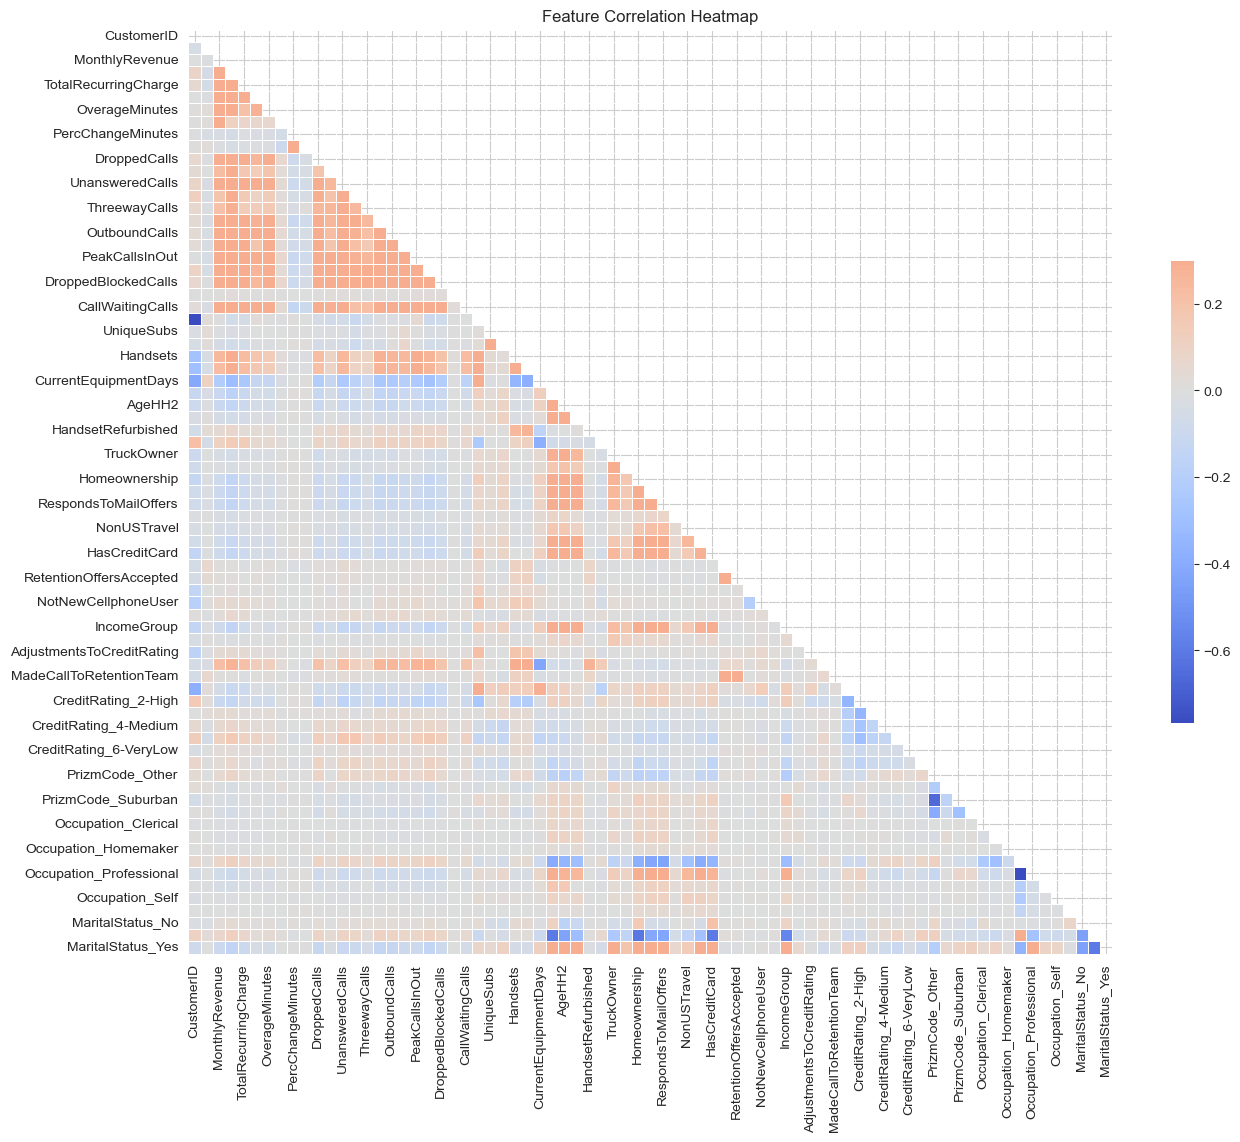

In [19]:
plot_correlation_heatmap(data)

In [31]:

def top_unique_correlated_features(corr_matrix, x=10):

    corr_df = corr_matrix.abs().stack().reset_index()
    corr_df.columns = ['Feature1', 'Feature2', 'Correlation']
    

    corr_df = corr_df[corr_df['Feature1'] != corr_df['Feature2']]
    

    corr_df.sort_values(by='Correlation', ascending=False, inplace=True)
    corr_df.drop_duplicates(subset=['Correlation'], inplace=True)

    top_correlations = corr_df.head(x)
    
   
    feature_pairs = top_correlations[['Feature1', 'Feature2']].values.tolist()
    correlation_values = top_correlations['Correlation'].values.tolist()
    
    return feature_pairs, correlation_values


unique_top_pairs, unique_top_values = top_unique_correlated_features(correlation_matrix, 10)

#nique_top_pairs, unique_top_values

sh = pd.DataFrame()


sh['Top Correlated Pairs'] = unique_top_pairs
sh['Correlation Coefficient'] = unique_top_values

In [32]:
sh

,Top Correlated Pairs,Correlation Coefficient
0,"[BuysViaMailOrder, RespondsToMailOffers]",0.967757
1,"[RetentionCalls, MadeCallToRetentionTeam]",0.957705
2,"[Handsets, HandsetModels]",0.888262
3,"[ReceivedCalls, MonthlyMinutes]",0.828206
4,"[DroppedBlockedCalls, BlockedCalls]",0.813961
5,"[Homeownership, HasCreditCard]",0.793680
6,"[MonthlyRevenue, OverageMinutes]",0.787317
7,"[ActiveSubs, UniqueSubs]",0.773931
8,"[PeakCallsInOut, MonthlyMinutes]",0.772486
9,"[MonthsInService, CustomerID]",0.766762


In [20]:

def plot_minutes_vs_revenue(data):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='MonthlyMinutes', y='MonthlyRevenue', hue='Churn', data=data, palette='coolwarm')
    plt.title('Monthly Minutes vs. Monthly Revenue')
    plt.xlabel('Monthly Minutes')
    plt.ylabel('Monthly Revenue')
    plt.show()

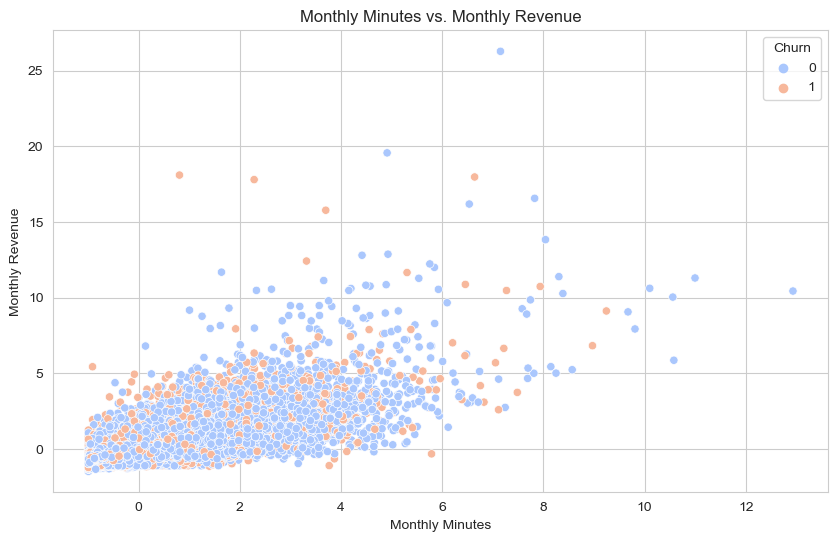

In [21]:
plot_minutes_vs_revenue(data)